# SLU15 - Algorithms: Learning notebook

In this notebook we will cover the following:

- K-nearest neighbours
- Gaussian Naive Bayes
- Decision Tree
- Ensembling
- Random Forest
- Boosting

### Imports and utils

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import paired_distances
from sklearn.datasets import make_moons, make_circles, make_blobs, make_checkerboard
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from utils import classifier_decision_graph, classifier_decision_graphs
%matplotlib inline

df = pd.read_csv('data/parabola_data')
X_parabola = df.drop('label', axis=1)
y_parabola = df['label']
X_blobs, y_blobs = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1, random_state=3)
X_circles, y_circles = make_circles(n_samples=300, noise=0.1, factor=0.4, random_state=0)
X_moons, y_moons= make_moons(n_samples=300, noise=0.1, random_state=0)

ds = [[X_blobs, y_blobs],
      [X_parabola, y_parabola],
      [X_circles, y_circles],
      [X_moons, y_moons]
     ]

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Why isn't the Logistic Regression enough?

In the context of classification, there are certain types of supervised learning problems that Logistic Regression does not perform well.

First, let me show you a case in which it does work.

ROC AUC Score:
1.0


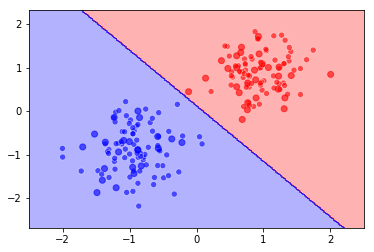

In [2]:
clf = LogisticRegression(random_state=0) 

classifier_decision_graph(clf, X_blobs, y_blobs)

In this dataset, the Logistic Regression can separate the two classes throught a linear decision boundary.


However, when our data is not linearly separable, the Logistic Regression cannot classify it accurately.

Let's see a dataset in which the two classes are separated by a parabola shaped decision boundary:

ROC AUC Score:
0.8003220611916263


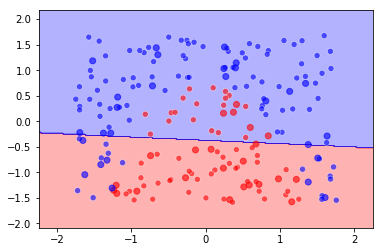

In [3]:
clf = LogisticRegression(random_state=0)

classifier_decision_graph(clf, X_parabola, y_parabola)

This happens because the Logistic Regression assumes that each variable is independent from one another. In this dataset, we would need to consider both variables at the same time in order to correctly discriminate our classes.

There are many machine learning algorithms that can do this, so let's start with a super simple one!

# K-Nearest Neighbours

[K-Nearest Neighbours](http://scikit-learn.org/stable/modules/neighbors.html) is a simple machine learning algorithm that classifies new datapoints by their "proximity" to datapoints it has been trained on.

<img src="data/knn.png" width="400">

It has an important hyperparameter (a rule that dictates how it "learns"), which is `n_neighbors`. As you can see on the example, the star is the new datapoint: If you use `n_neighbors` = 3, it will classify the new datapoint as blue, because the 3 closest points to it are, on average, blue. (2 blue points and 1 yellow point)

However, if you use `n_neighbors` = 6, the new datapoint is classified as yellow, because the 6 closest points to it are, on average, yellow. (4 yellow points and 2 blue points)

Let's see it in action on a few datasets:

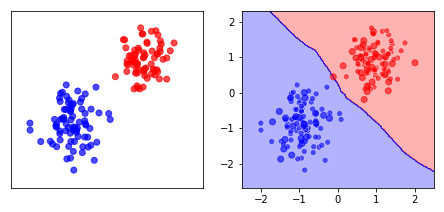

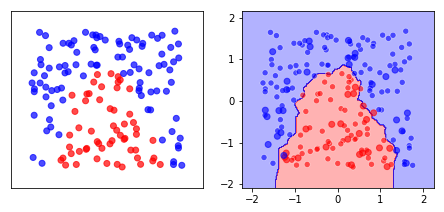

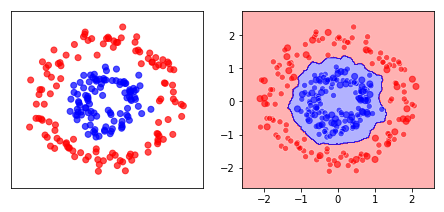

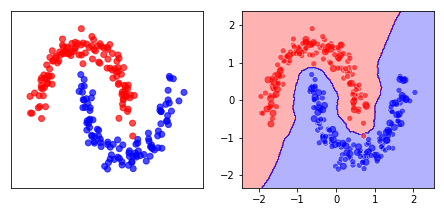

In [4]:
clf = KNeighborsClassifier(n_neighbors=3)

classifier_decision_graphs(clf, ds)

### Pros of K-Nearest Neighbors:
> * Easy to understand and implement

> * Non-parametric (can deal with nonlinear decision boundaries)

> * Extremely fast to train (lazy learner)

### Cons of K-Nearest Neighbors:

> * Doesn’t attribute weight to features; cares only about the distance.
> * Doesn’t handle missing data gracefully
> * Slow during prediction (lazy learner); the bigger the training set, the slower the prediction.

### When should you use K-Nearest Neighbors?

> * When you have a nonlinear decision boundary
> * When you don’t have a lot of data


Let's see more machine learning algorithms:

# Gaussian Naive Bayes

[Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) is a machine learning algorithm based on Bayesian probability.

You maybe recognize this: 

<img src="data/bayes.png" width="400">

That's Bayes theorem, which let's us predict the probability of a certain event, conditional on the occurence of other events. 

In classification, this machine learning algorithm records the probability of belonging to a class given the variables, so it can later predict the probability of belonging to a certain class knowing only the variables.

It's sort of like showing it an apple that is red, round, and around 10 cm. It will memorize the objects that are red, round and around 10 cm are probably apples.

Let's see it in action:

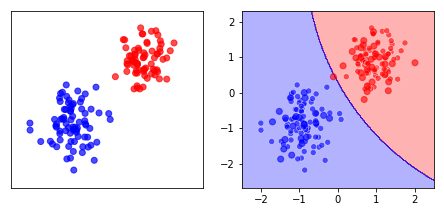

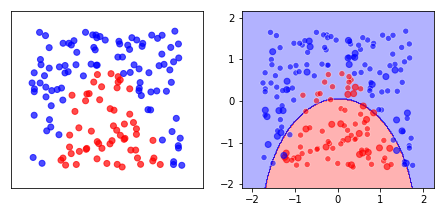

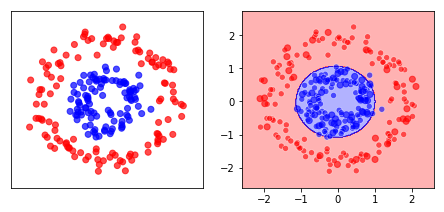

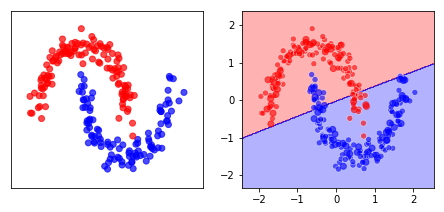

In [5]:
clf = GaussianNB()

classifier_decision_graphs(clf, ds)

### Pros of Naive Bayes:
> * Fast to train
> * Fast to Predict (Eager learner)
> * Performs well in multi class classification

### Cons of Naive Bayes:

> * Assumes that features are independent
> * Can be fooled by correlated features

### When should you use Naive Bayes?

> * When you want to do real time Prediction
> * When you want to do Text classification
> * When you want to do a Recommendation System

# Decision Tree

[Decision Tree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is a machine learning algorithm that attempts to group the data into subsets as homogenous as possible.

For example, in the image below, we're trying to predict which people play cricket. We split people according to their characteristics, so that each group is as homogenous as possible with regards to playing cricket.

<img src="data/decision_tree_split.png" width="1000">

According to the data above, we would first split based on gender. After that, we can keep spliting the data further.

<img src="data/decision_tree_structure.png" width="600">

Above you can see the nomemculature of the structure of a decision tree.

Let's see it in action!

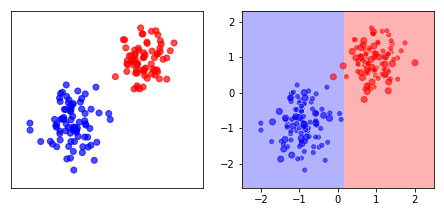

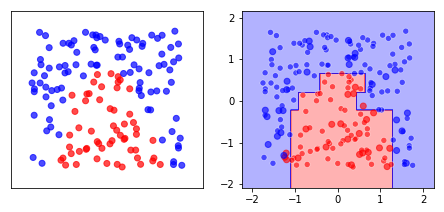

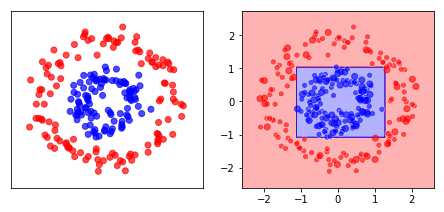

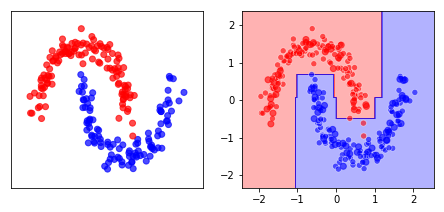

In [6]:
clf = DecisionTreeClassifier(random_state=0)

classifier_decision_graphs(clf, ds)

### Pros of Decision Tree:
> * Easy to understand (you can actually look at a decision tree)
> * Non-parametric (can deal with nonlinear decision boundaries)
> * Resistant to outliers

### Cons of Decision Tree:

> * Extremely prone to overfitting

### When should you use a Decision Tree?

> * When you need a model that can deal with non-linear decision boundaries that is explainable.

# Random Forest

[Random Forest](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) is an ensemble machine learning algorithm. An ensemble is basically a model which is composed by a many smaller, weaker models, that "vote" on the decision.

In this case, a random forest is composed by many decision trees, each of which has access to a different part of the dataset. This help in dramatically reducing overfitting, at the expense of model complexity.

<img src="data/random_forest.png" width="400">

Let's see it in action!

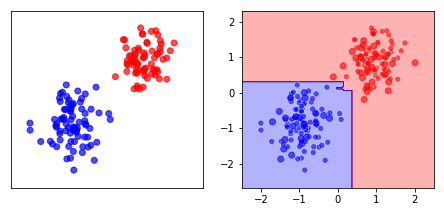

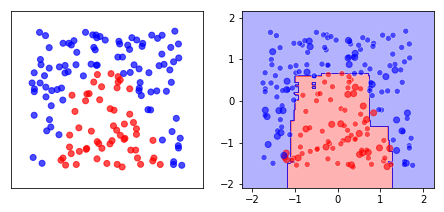

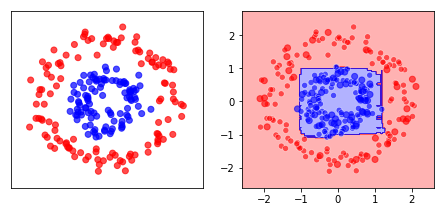

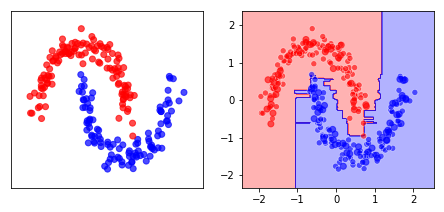

In [7]:
clf = RandomForestClassifier(random_state=0)

classifier_decision_graphs(clf, ds)

### Pros of Random Forest:
> * Non-parametric (can deal with nonlinear decision boundaries)
> * Resistant to outliers
> * Resistant to overfitting
> * Good at handling large datasets with lots of features (high dimensionality), because it’s embarrassingly parallel
> * Can measures the importance of the different variables


### Cons of Random Forest:

> * Hard to explain: since it is composed by multiple smaller decision trees, it rapidly becomes hard to understand due to the increased complexity.

### When should you use Random Forest.

> * When you need a powerful and versatile model that can deal with non-linear decision boundaries, and explainability isn't critical.